# K_Nearest_Neighbour(KNN):
is a `supervised machine learning algorithm` that can be used to solve both `classification and regression`.


It is a `non-parameteric`, lazy learning algorithm, `non-parametric` means that it does not make any assumptions on the underlying data distribution. `Lazy learning` means that it does not require any training data points for `model generation`. All training data used in the testing phase. This make training `faster` and `testing phase slower` and `costlier`.


KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much smiliar to new data.

In [1]:
# KNN classifier on IRIS dataset:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# split the data
X=df.drop('species', axis=1)
y= df['species']

In [10]:
# load and fit the KNN classifier on the data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

# predict the species for a new set of measurments
new_measurement= np.array([[5.1, 3.5, 1.4, 0.2]])
knn.predict(new_measurement)


c:\Users\Summaiya\.conda\envs\ydata_profiling\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

classification_report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'true')

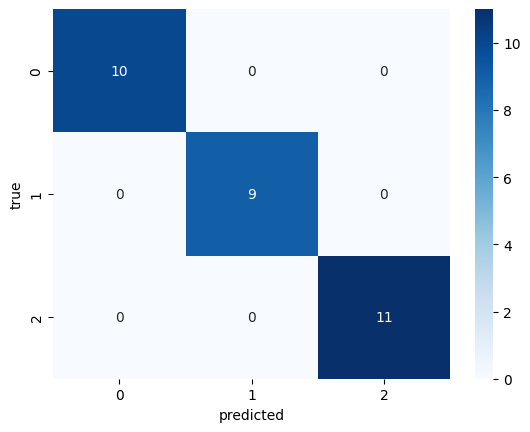

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model= KNeighborsClassifier(n_neighbors=5)
# train the model
model.fit(X_train, y_train)

# predict the model
y_pred= model.predict(X_test)

# evaluation
print('classification_report: \n', classification_report(y_test, y_pred))
print('confusion_matrix: \n', confusion_matrix(y_test, y_pred))

# plot
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')

In [43]:
# KNN regression on tips dataset:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [44]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
# encoding the categorical columns using for loop and le
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col]= le.fit_transform(X[col])

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model= KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
# train the model
model.fit(X_train, y_train)

# predict the model
y_pred= model.predict(X_test)
# evaluation
print(f'Mean Squred Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2_Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean Squred Error: 0.8382265306122448
R2_Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [55]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [59]:
# predict the specific vallues
model.predict([[19.82,	1,	0,	1,	0,	2]])


c:\Users\Summaiya\.conda\envs\ydata_profiling\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.884])